In [2]:
import xarray as xr
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt 
from matplotlib import ticker, cm
import matplotlib.cm as mcm
from matplotlib.ticker import MaxNLocator
import matplotlib.colors as colors
import matplotlib.dates as mdates
from matplotlib.colors import LogNorm
from matplotlib.colors import Normalize
from matplotlib.ticker import FuncFormatter
jet = mcm.get_cmap('jet') if isinstance(mcm.get_cmap('jet'), str) else mcm.get_cmap('jet')
import netCDF4 as nc
import cartopy.crs as ccrs # CRS stands for "Coordinate reference systems" for map projection
from cartopy.crs import PlateCarree
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter 
import matplotlib.gridspec as gridspec
import os 
import glob
import re
import nc_time_axis
import time 
import dask.array as da

def scientific_formatter(x, pos):
    if x == 0:
        return "$0$"
    exponent = int(np.floor(np.log10(x)))
    base = round(x / 10**exponent)
    if base == 1:
        return f"$10^{{{exponent}}}$"
    else:
        return f"${base} \\times 10^{{{exponent}}}$"


/tmp/ipykernel_192517/2295570219.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  jet = mcm.get_cmap('jet') if isinstance(mcm.get_cmap('jet'), str) else mcm.get_cmap('jet')


# Global Plots

## File reading

### Algorithm output for SpE Events

In [2]:
WACCM_UL = 150
ds_months_ar = np.arange(0,3)   

win_Monthfolderstr = 'Dec-Feb'
win_ds_months = ['12','01','02']

spr_Monthfolderstr = 'Mar-May'
spr_ds_months = ['03','04','05']

sum_Monthfolderstr = 'Jun-Aug'
sum_ds_months = ['06','07','08']

aut_Monthfolderstr = 'Sep-Nov'
aut_ds_months = ['09','10','11']

run_name = 'Solar_Comp'

filename_append = '0.25sigma_2xMpza_1xpeak'     

#----------------------------------------------------------------------------------------

win_file_med = f'/resstore/b0243/Data/Sporadic_E/Solar_Med/SpE_Algorithm_Output_yr2000/Wuhu_IonTr_run_SpE_Output_{win_Monthfolderstr}_90-150km_{filename_append}.nc'
spr_file_med = f'/resstore/b0243/Data/Sporadic_E/Solar_Med/SpE_Algorithm_Output_yr2000/Wuhu_IonTr_run_SpE_Output_{spr_Monthfolderstr}_90-150km_{filename_append}.nc'
sum_file_med = f'/resstore/b0243/Data/Sporadic_E/Solar_Med/SpE_Algorithm_Output_yr2000/Wuhu_IonTr_run_SpE_Output_{sum_Monthfolderstr}_90-150km_{filename_append}.nc'
aut_file_med = f'/resstore/b0243/Data/Sporadic_E/Solar_Med/SpE_Algorithm_Output_yr2000/Wuhu_IonTr_run_SpE_Output_{aut_Monthfolderstr}_90-150km_{filename_append}.nc'

ds_win_med = xr.open_dataset(win_file_med, decode_times=False)
ds_spr_med = xr.open_dataset(spr_file_med, decode_times=False)
ds_sum_med = xr.open_dataset(sum_file_med, decode_times=False)
ds_aut_med = xr.open_dataset(aut_file_med, decode_times=False)

#----------------------------------------------------------------------------------------

win_file_min = f'/resstore/b0243/Data/Sporadic_E/Solar_Min/SpE_Algorithm_Output_yr2000/SMin_SpE_Output_{win_Monthfolderstr}_90-150km_{filename_append}.nc'
spr_file_min = f'/resstore/b0243/Data/Sporadic_E/Solar_Min/SpE_Algorithm_Output_yr2000/SMin_SpE_Output_{spr_Monthfolderstr}_90-150km_{filename_append}.nc'
sum_file_min = f'/resstore/b0243/Data/Sporadic_E/Solar_Min/SpE_Algorithm_Output_yr2000/SMin_SpE_Output_{sum_Monthfolderstr}_90-150km_{filename_append}.nc'
aut_file_min = f'/resstore/b0243/Data/Sporadic_E/Solar_Min/SpE_Algorithm_Output_yr2000/SMin_SpE_Output_{aut_Monthfolderstr}_90-150km_{filename_append}.nc'

ds_win_min = xr.open_dataset(win_file_min, decode_times=False)
ds_spr_min = xr.open_dataset(spr_file_min, decode_times=False)
ds_sum_min = xr.open_dataset(sum_file_min, decode_times=False)
ds_aut_min = xr.open_dataset(aut_file_min, decode_times=False)

#----------------------------------------------------------------------------------------

win_file_max = f'/resstore/b0243/Data/Sporadic_E/Solar_Max/SpE_Algorithm_Output_yr2000/SMax_SpE_Output_{win_Monthfolderstr}_90-150km_{filename_append}.nc'
spr_file_max = f'/resstore/b0243/Data/Sporadic_E/Solar_Max/SpE_Algorithm_Output_yr2000/SMax_SpE_Output_{spr_Monthfolderstr}_90-150km_{filename_append}.nc'
sum_file_max = f'/resstore/b0243/Data/Sporadic_E/Solar_Max/SpE_Algorithm_Output_yr2000/SMax_SpE_Output_{sum_Monthfolderstr}_90-150km_{filename_append}.nc'
aut_file_max = f'/resstore/b0243/Data/Sporadic_E/Solar_Max/SpE_Algorithm_Output_yr2000/SMax_SpE_Output_{aut_Monthfolderstr}_90-150km_{filename_append}.nc'

ds_win_max = xr.open_dataset(win_file_max, decode_times=False)
ds_spr_max = xr.open_dataset(spr_file_max, decode_times=False)
ds_sum_max = xr.open_dataset(sum_file_max, decode_times=False)
ds_aut_max = xr.open_dataset(aut_file_max, decode_times=False)

#----------------------------------------------------------------------------------------

win_file_cli = f'/resstore/b0243/Data/Sporadic_E/Year_2100/cli_cha_SpE_Output_{win_Monthfolderstr}_90-150km_{filename_append}.nc'
spr_file_cli = f'/resstore/b0243/Data/Sporadic_E/Year_2100/cli_cha_SpE_Output_{spr_Monthfolderstr}_90-150km_{filename_append}.nc'
sum_file_cli = f'/resstore/b0243/Data/Sporadic_E/Year_2100/cli_cha_SpE_Output_{sum_Monthfolderstr}_90-150km_{filename_append}.nc'
aut_file_cli = f'/resstore/b0243/Data/Sporadic_E/Year_2100/cli_cha_SpE_Output_{aut_Monthfolderstr}_90-150km_{filename_append}.nc'

ds_win_cli = xr.open_dataset(win_file_cli, decode_times=False)
ds_spr_cli = xr.open_dataset(spr_file_cli, decode_times=False)
ds_sum_cli = xr.open_dataset(sum_file_cli, decode_times=False)
ds_aut_cli = xr.open_dataset(aut_file_cli, decode_times=False)

# #----------------------------------------------------------------------------------------

# ds_sum_cli

### Raw datasets for temp, chemical species, wind etc

In [ ]:
# define function which computes monthly / seasonal averages of a given variable 
def process_nc_files(file_pattern, regex, var):
    
    # Find and group files by month
    file_paths = sorted(glob.glob(file_pattern))
    files_by_month = {}
    monthly_averages = {}
    seasonal_averages = {season: [] for season in ["spring", "summer", "autumn", "winter"]}

    for file_path in file_paths:
        match = re.search(regex, file_path)
        if match:
            month = int(match.group(1))  # Extract month
            files_by_month.setdefault(month, []).append(file_path)
        else:
            print(f"Skipping file with unexpected format: {file_path}")

    # Compute monthly averages
    for month, files in files_by_month.items():
        print(f"Processing month {month} with {len(files)} files.")
        ds = xr.open_mfdataset(files, combine='by_coords')
        if var in ds:
            monthly_averages[month] = ds[var].mean(dim='time')
        else:
            print(f"Variable {var} not found in files for month {month}.")
        ds.close()

    # Compute seasonal averages
    season_months = {"spring": [3, 4, 5], "summer": [6, 7, 8], "autumn": [9, 10, 11], "winter": [12, 1, 2]}
    for season, months in season_months.items():
        seasonal_data = [monthly_averages[month] for month in months if month in monthly_averages]
        if seasonal_data:
            seasonal_averages[season] = sum(seasonal_data) / len(seasonal_data)

    # Print summary
    print("Monthly Averages:", list(monthly_averages.keys()))
    print("Seasonal Averages:", list(seasonal_averages.keys()))

    # Create a list to hold monthly DataArrays
    monthly_data = []
    for month in range(1, 13):  # Loop through months 1 to 12
        if month in monthly_averages:
            da = monthly_averages[month]
            da = da.expand_dims(dim={'month': [month]})  # Add a 'month' dimension
            monthly_data.append(da)
        else:
            if len(monthly_data) > 0:
                template = monthly_data[0]
                nan_da = xr.full_like(template, np.nan).expand_dims(dim={'month': [month]})
                monthly_data.append(nan_da)

    # Combine all monthly DataArrays along the 'month' dimension
    result = xr.concat(monthly_data, dim='month')

    # change 'lev' to 'altavg' / km based on ds_medsum
    result = result.assign_coords(altavg=ds_sum_med['altavg']).swap_dims({'lev':'altavg'})

    # Check the resulting DataArray
    print(result)
    return result


In [ ]:
variable = 'H2O'

In [ ]:
  # Replace with your desired variable name 
run_name = 'Solar Med' # OR # 'Solar Med'
                            # 'Solar Max'
                            # 'Solar Min'
                            # 'Climate Change' 

if run_name == 'Solar Med':
    file_pattern = '/uolstore/Research/b/b0243/Data/Sporadic_E/Solar_Med/archive_yr2000/*.nc'
    regex = r'.*h2\.0001-(\d{2})-(\d{2})-\d{5}\.nc'

elif run_name == 'Solar Max':
    file_pattern = '/uolstore/Research/b/b0243/Data/Sporadic_E/Solar_Max/archive_yr2000/atm/hist/*.nc'
    regex = r'.*h1\.0001-(\d{2})-(\d{2})-\d{5}\.nc'

elif run_name == 'Solar Min':
    file_pattern = '/uolstore/Research/b/b0243/Data/Sporadic_E/Solar_Min/archive_yr2000/atm/hist/*.nc'
    regex = r'.*h1\.0001-(\d{2})-(\d{2})-\d{5}\.nc'

elif run_name == 'Climate Change':
    file_pattern = '/uolstore/Research/b/b0243/Data/earfw/FX2100f19f19mg16NaFeMgiontransport/hist/*.nc'
    regex = r'.*h2\.2100-(\d{2})-(\d{2})-\d{5}\.nc'


ds_med = process_nc_files(file_pattern, regex, 'H2O')

In [ ]:
run_name = 'Climate Change' # OR # 'Solar Med'
                            # 'Solar Max'
                            # 'Solar Min'
                            # 'Climate Change' 

if run_name == 'Solar Med':
    file_pattern = '/uolstore/Research/b/b0243/Data/Sporadic_E/Solar_Med/archive_yr2000/*.nc'
    regex = r'.*h2\.0001-(\d{2})-(\d{2})-\d{5}\.nc'

elif run_name == 'Solar Max':
    file_pattern = '/uolstore/Research/b/b0243/Data/Sporadic_E/Solar_Max/archive_yr2000/atm/hist/*.nc'
    regex = r'.*h1\.0001-(\d{2})-(\d{2})-\d{5}\.nc'

elif run_name == 'Solar Min':
    file_pattern = '/uolstore/Research/b/b0243/Data/Sporadic_E/Solar_Min/archive_yr2000/atm/hist/*.nc'
    regex = r'.*h1\.0001-(\d{2})-(\d{2})-\d{5}\.nc'

elif run_name == 'Climate Change':
    file_pattern = '/uolstore/Research/b/b0243/Data/earfw/FX2100f19f19mg16NaFeMgiontransport/hist/*.nc'
    regex = r'.*h2\.2100-(\d{2})-(\d{2})-\d{5}\.nc'


ds_cli = process_nc_files(file_pattern, regex, variable)

In [ ]:
run_name = 'Solar Max' # OR # 'Solar Med'
                            # 'Solar Max'
                            # 'Solar Min'
                            # 'Climate Change' 

if run_name == 'Solar Med':
    file_pattern = '/uolstore/Research/b/b0243/Data/Sporadic_E/Solar_Med/archive_yr2000/*.nc'
    regex = r'.*h2\.0001-(\d{2})-(\d{2})-\d{5}\.nc'

elif run_name == 'Solar Max':
    file_pattern = '/uolstore/Research/b/b0243/Data/Sporadic_E/Solar_Max/archive_yr2000/atm/hist/*.nc'
    regex = r'.*h1\.0001-(\d{2})-(\d{2})-\d{5}\.nc'

elif run_name == 'Solar Min':
    file_pattern = '/uolstore/Research/b/b0243/Data/Sporadic_E/Solar_Min/archive_yr2000/atm/hist/*.nc'
    regex = r'.*h1\.0001-(\d{2})-(\d{2})-\d{5}\.nc'

elif run_name == 'Climate Change':
    file_pattern = '/uolstore/Research/b/b0243/Data/earfw/FX2100f19f19mg16NaFeMgiontransport/hist/*.nc'
    regex = r'.*h2\.2100-(\d{2})-(\d{2})-\d{5}\.nc'


ds_max = process_nc_files(file_pattern, regex, variable)

In [ ]:
run_name = 'Solar Min' # OR # 'Solar Med'
                            # 'Solar Max'
                            # 'Solar Min'
                            # 'Climate Change' 

if run_name == 'Solar Med':
    file_pattern = '/uolstore/Research/b/b0243/Data/Sporadic_E/Solar_Med/archive_yr2000/*.nc'
    regex = r'.*h2\.0001-(\d{2})-(\d{2})-\d{5}\.nc'

elif run_name == 'Solar Max':
    file_pattern = '/uolstore/Research/b/b0243/Data/Sporadic_E/Solar_Max/archive_yr2000/atm/hist/*.nc'
    regex = r'.*h1\.0001-(\d{2})-(\d{2})-\d{5}\.nc'

elif run_name == 'Solar Min':
    file_pattern = '/uolstore/Research/b/b0243/Data/Sporadic_E/Solar_Min/archive_yr2000/atm/hist/*.nc'
    regex = r'.*h1\.0001-(\d{2})-(\d{2})-\d{5}\.nc'

elif run_name == 'Climate Change':
    file_pattern = '/uolstore/Research/b/b0243/Data/earfw/FX2100f19f19mg16NaFeMgiontransport/hist/*.nc'
    regex = r'.*h2\.2100-(\d{2})-(\d{2})-\d{5}\.nc'


ds_min = process_nc_files(file_pattern, regex, variable)

## Plotting

In [ ]:
selected_month = 7  # Change this to plot other months
selected_alt = 100 # km
var = variable

if selected_month in ds_cli['month']:
    ds_cli = ds_cli.sel(month=selected_month, drop=False)
    
    if 'altavg' in ds_cli.dims:
        ds_2dcli = ds_cli.sel(altavg=selected_alt, method='nearest')
    else:
        ds_2dcli = ds_cli    
   
    # Ensure no residual dimensions other than lat and lon
    ds_2dcli= ds_2dcli.mean(dim=[dim for dim in ds_2dcli.dims if dim not in ['lat', 'lon']])
    
    # Extract latitude and longitude
    lat = ds_2dcli['lat'].values
    lon = ds_2dcli['lon'].values
    
    # Check dimensions
    print(f"Dimensions of {var}_month_2d:", ds_2dcli.dims)
    print(f"Shape of {var}_month_2d:", ds_2dcli.shape)

if selected_month in ds_med['month']:
    ds_med = ds_med.sel(month=selected_month)
    
    if 'altavg' in ds_med.dims:
        ds_2dmed = ds_med.sel(altavg=selected_alt, method='nearest')
    else:
        ds_2dmed = ds_med  
   
    # Ensure no residual dimensions other than lat and lon
    ds_2dmed= ds_2dmed.mean(dim=[dim for dim in ds_2dmed.dims if dim not in ['lat', 'lon']])
    
    # Extract latitude and longitude
    lat = ds_2dmed['lat'].values
    lon = ds_2dmed['lon'].values
    
    # Check dimensions
    print(f"Dimensions of {var}_month_2d:", ds_2dmed.dims)
    print(f"Shape of {var}_month_2d:", ds_2dmed.shape)

if selected_month in ds_max['month']:
    ds_max = ds_max.sel(month=selected_month)
    
    if 'altavg' in ds_max.dims:
        ds_2dmax = ds_max.sel(altavg=selected_alt, method='nearest')
    else:
        ds_2dmax = ds_max  
   
    # Ensure no residual dimensions other than lat and lon
    ds_2dmax= ds_2dmax.mean(dim=[dim for dim in ds_2dmax.dims if dim not in ['lat', 'lon']])
    
    # Extract latitude and longitude
    lat = ds_2dmax['lat'].values
    lon = ds_2dmax['lon'].values
    
    # Check dimensions
    print(f"Dimensions of {var}_month_2d:", ds_2dmax.dims)
    print(f"Shape of {var}_month_2d:", ds_2dmax.shape)

if selected_month in ds_min['month']:
    ds_min = ds_min.sel(month=selected_month)
    
    if 'altavg' in ds_min.dims:
        ds_2dmin = ds_min.sel(altavg=selected_alt, method='nearest')
    else:
        ds_2dmin = ds_min 
   
    # Ensure no residual dimensions other than lat and lon
    ds_2dmin= ds_2dmin.mean(dim=[dim for dim in ds_2dmin.dims if dim not in ['lat', 'lon']])
    
    # Extract latitude and longitude
    lat = ds_2dmin['lat'].values
    lon = ds_2dmin['lon'].values
    
    # Check dimensions
    print(f"Dimensions of {var}_month_2d:", ds_2dmin.dims)
    print(f"Shape of {var}_month_2d:", ds_2dmin.shape)

In [ ]:
from dask.distributed import Client
client = Client()

In [ ]:
ds_2dmed = ds_2dmed.chunk({'lat': 50, 'lon': 50})  # Adjust chunk sizes based on your dataset
ds_2dcli = ds_2dcli.chunk({'lat': 50, 'lon': 50})
ds_2dmax = ds_2dmax.chunk({'lat': 50, 'lon': 50})
ds_2dmin = ds_2dmin.chunk({'lat': 50, 'lon': 50})

In [ ]:
ds_2dmed = ds_2dmed.compute()
print('First one done...')
ds_2dcli = ds_2dcli.compute()
print('Getting there...')
ds_2dmax = ds_2dmax.compute()
print('Finish line in sight...')
ds_2dmin = ds_2dmin.compute()
print('Yippee!!!!')

In [ ]:
# ds_diff = (ds_2dcliT - ds_2dmedT)

In [ ]:
# fig , ax = plt.subplots(figsize=(10,6), subplot_kw={'projection': ccrs.PlateCarree()})

# contour = ax.contour(lon, 
#                       lat, 
#                       ds_diff, 
#                       # colors='black',
#                       cmap = plt.get_cmap('coolwarm'),
#                       transform=ccrs.PlateCarree(), 
#                       #levels=np.linspace(ds_diff.min().values, ds_diff.max().values, 20)
#                     norm=colors.TwoSlopeNorm(vcenter=0)
#                      )
# cbar = plt.colorbar(contour, ax=ax, orientation='vertical', pad=0.05, aspect=30)
# ax.coastlines()
# ax.gridlines(draw_labels=True,
#              dms=True,
#              x_inline=False,
#              y_inline=False
#             )
# plt.clabel(contour, inline=True, fontsize=10)
# ax.set_title(f'Difference (Year 2100 - SMed) in Monthly Average of {var} in Month {selected_month} at altitude {selected_alt} km')
# # plt.savefig(f'/home/home02/cm21cmr/Sporadic-E-Project/Figures/diff_{var}_alt_{selected_alt}_month_{selected_month}', dpi=400, bbox_inches='tight')
# plt.show()

In [ ]:
# Create a figure with Cartopy
fig, axes = plt.subplots(2,2,figsize=(30, 18), subplot_kw={'projection': ccrs.PlateCarree()})
    
# Contour plot of variable 
contour1 = axes[0,0].contourf(lon, 
                                lat, 
                                ds_2dmed, 
                                cmap = plt.get_cmap('coolwarm'),
                                transform=ccrs.PlateCarree(), 
                                # norm=colors.TwoSlopeNorm(vcenter=200)
                            )
plt.clabel(contour1, inline=True, fontsize=10)
cbar = plt.colorbar(contour1, ax=axes[0,0], orientation='vertical', shrink = 0.5) #, pad=0.05, aspect=30)
cbar.set_label(f'{var} (units)', fontsize=12)
axes[0,0].set_title(f'Monthly Average of {var} in Month {selected_month} at altitude {selected_alt} km in Solar Med Year')
axes[0,0].coastlines()
axes[0,0].gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
print(f'{contour1} done!')


contour2 = axes[1,0].contourf(lon, 
                                lat, 
                                ds_2dcli,
                                cmap = plt.get_cmap('coolwarm'),
                                transform=ccrs.PlateCarree(), 
                                # norm=colors.TwoSlopeNorm(vcenter=200)
                             )
plt.clabel(contour2, inline=True, fontsize=10)
cbar = plt.colorbar(contour2, ax=axes[1,0], orientation='vertical',shrink = 0.5) #, pad=0.05, aspect=30)
cbar.set_label(f'{var} (units)', fontsize=12)
axes[1,0].set_title(f'Monthly Average of {var} in Month {selected_month} at altitude {selected_alt} km in Year 2100')
axes[1,0].coastlines()
axes[1,0].gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
print(f'{contour2} done!')


contour3 = axes[0,1].contourf(lon, 
                                lat, 
                                ds_2dmax,
                                cmap = plt.get_cmap('coolwarm'),
                                transform=ccrs.PlateCarree(), 
                                # norm=colors.TwoSlopeNorm(vcenter=200)
                             )
plt.clabel(contour3, inline=True, fontsize=10)
cbar = plt.colorbar(contour3, ax=axes[0,1], orientation='vertical',shrink = 0.5) #, pad=0.05, aspect=30)
cbar.set_label(f'{var} (units)', fontsize=12)
axes[0,1].set_title(f'Monthly Average of {var} in Month {selected_month} at altitude {selected_alt} km in Solar Max')
axes[0,1].coastlines()
axes[0,1].gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
print(f'{contour3} done!')



contour4 = axes[1,1].contourf(lon, 
                                lat, 
                                ds_2dmin, 
                                cmap = plt.get_cmap('coolwarm'),
                                transform=ccrs.PlateCarree(), 
                                # norm=colors.TwoSlopeNorm(vcenter=200)
                             )
plt.clabel(contour4, inline=True, fontsize=10)
cbar = plt.colorbar(contour4, ax=axes[1,1], orientation='vertical',shrink = 0.5) #, pad=0.05, aspect=30)
cbar.set_label(f'{var} (units)', fontsize=12)
axes[1,1].set_title(f'Monthly Average of {var} in Month {selected_month} at altitude {selected_alt} km in Solar Min')
axes[1,1].coastlines()
axes[1,1].gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
print(f'{contour4} done!')




# plt.savefig(f'/home/home02/cm21cmr/Sporadic-E-Project/Figures/{var}_comparison_alt-{selected_alt}_month-{selected_month}', dpi=400, bbox_inches='tight')
plt.show()
 

# Value line plots - averaged by month 

## Raw code

In [ ]:
# testpath = f'/resstore/b0243/Data/Sporadic_E/Solar_Med/archive_yr2000/ACP_CESM213_FX2000_f19_f19_mg16_Na_Fe_Mg_iontransport.cam.h0.0001-01.nc'
# test = xr.open_dataset(testpath, decode_times=False)
# test

In [ ]:
# ds = xr.open_dataset(testpath, decode_times=False)
# ds = ds[var].sel(time=ds['time'][-1].item())
# ds = ds.assign_coords(altavg=ds_sum_med['altavg']).swap_dims({'lev':'altavg'})
# ds = ds.sel(altavg = altitude, method = 'nearest')

# lat_bins = np.arange(-90, 95, 5)  # Ensures full 5-degree bins
# lat_bin_labels = (lat_bins[:-1] + lat_bins[1:]) / 2  # Midpoints of bins

# binned = (
#         ds.groupby_bins("lat", lat_bins, labels=lat_bin_labels).mean(dim=["lat", "lon"])
#            )

# # Reset dimension name by converting `lat_bins` to `lat`
# binned = binned.rename({"lat_bins": "lat"})

# # Ensure `lat` is a proper coordinate
# binned = binned.assign_coords(lat=("lat", binned.lat.values))
# binned

In [ ]:
# testavg = var_month_avg(testpath, var, 100)
# testavg

In [ ]:
# def month_to_season(run_name):
    
#     if run_name == 'Climate Change':
#         months = {1,2,3,4,5,6,7,8,9,10,11}

#     else: 
#         months = {1,2,3,4,5,6,7,8,9,10,11,12}

#     spr
    
#     for month in months:
        
#         month_str = f"{month:02}"
        
#         if run_name == 'Solar Med':
#             filepath = f'/resstore/b0243/Data/Sporadic_E/Solar_Med/archive_yr2000/ACP_CESM213_FX2000_f19_f19_mg16_Na_Fe_Mg_iontransport.cam.h0.0001-{month_str}.nc'
#             run_str = 'med'

#         elif run_name == 'Solar Max':
#             filepath = f'/resstore/b0243/Data/Sporadic_E/Solar_Max/archive_yr2000/atm/hist/SMax_3M_FX2000_f19f19mg16.cam.h0.0001-{month_str}.nc'
#             run_str = 'max'
    
#         elif run_name == 'Solar Min':
#             filepath = f'/resstore/b0243/Data/Sporadic_E/Solar_Min/archive_yr2000/atm/hist/SMin_3M_FX2000_f19f19mg16.cam.h0.0001-{month_str}.nc'
#             run_str = 'min'

#         elif run_name == 'Climate Change':
#             filepath = f'/resstore/b0243/Data/Sporadic_E/FX2100f19f19mg16NaFeMgiontransport_OUTPUT/hist/FX2100f19f19mg16NaFeMgiontransport.cam.h0.2100-{month_str}.nc'
#             run_str = 'cli'
    
#         month_avg =  var_month_avg(filepath, var, altitude)
#         month_avg.name = f'{run_str}_{month}_avg'
#         print(month_avg)

#         if month == 1:
#             month_avg
        
#     return month_avg

## Functions

Test to check variable names

In [20]:
testpath = f'/resstore/b0243/Data/Sporadic_E/Solar_Med/archive_yr2000/ACP_CESM213_FX2000_f19_f19_mg16_Na_Fe_Mg_iontransport.cam.h0.0001-01.nc'
test = xr.open_dataset(testpath, decode_times=False)
test

<xarray.Dataset>
Dimensions:          (lat: 96, lon: 144, mlat: 97, mlon: 80, zlon: 1, nbnd: 2,
                      lev: 126, ilev: 127, time: 1)
Coordinates:
  * lat              (lat) float64 -90.0 -88.11 -86.21 ... 86.21 88.11 90.0
  * lon              (lon) float64 0.0 2.5 5.0 7.5 ... 350.0 352.5 355.0 357.5
  * mlat             (mlat) float64 -90.0 -88.12 -86.24 ... 86.24 88.12 90.0
  * mlon             (mlon) float64 -180.0 -175.5 -171.0 ... 166.5 171.0 175.5
  * zlon             (zlon) float64 0.0
  * lev              (lev) float64 4.055e-10 5.207e-10 6.686e-10 ... 970.6 992.6
  * ilev             (ilev) float64 3.551e-10 4.559e-10 ... 985.1 1e+03
  * time             (time) float64 31.0
Dimensions without coordinates: nbnd
Data variables: (12/713)
    gw               (lat) float64 ...
    zlon_bnds        (zlon, nbnd) float64 ...
    hyam             (lev) float64 ...
    hybm             (lev) float64 ...
    P0               float64 ...
    hyai             (ilev) float64 ...
    ...               ...
    WD_HOCL          (time, lat, lon) float32 ...
    WI               (time, lev, lat, lon) float32 ...
    WTHzm            (time, ilev, lat, zlon) float32 ...
    Z3               (time, lev, lat, lon) float32 ...
    e                (time, lev, lat, lon) float32 ...
    e_SRF            (time, lat, lon) float32 ...
Attributes:
    Conventions:       CF-1.0
    source:            CAM
    case:              ACP_CESM213_FX2000_f19_f19_mg16_Na_Fe_Mg_iontransport
    logname:           earfw
    host:              d13s7b4.arc4.lee
    initial_file:      /nobackup/earfw/cesm2/cases/ACP_CESM213_FX2000_f19_f19...
    topography_file:   /nobackup/earfw/cesm2_inputdata//atm/cam/topo/USGS-gto...
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    time_period_freq:  month_1

In [3]:
def var_month_avg(filepath, var, altitude):

    ds = xr.open_dataset(filepath, decode_times=False)
    ds = ds[var].sel(time=ds['time'][-1].item())
    ds = ds.assign_coords(altavg=ds_sum_med['altavg']).swap_dims({'lev':'altavg'})
    ds = ds.sel(altavg =  altitude, method='nearest')

    lat_bins = np.arange(-90, 95, 5)  # Ensures full 5-degree bins
    lat_bin_labels = (lat_bins[:-1] + lat_bins[1:]) / 2  # Midpoints of bins

    binned = (
            ds.groupby_bins("lat", lat_bins, labels=lat_bin_labels).mean(dim=["lat", "lon"])
                )

    # Reset dimension name by converting `lat_bins` to `lat`
    binned = binned.rename({"lat_bins": "lat"})

    # Ensure `lat` is a proper coordinate
    binned = binned.assign_coords(lat=("lat", binned.lat.values))

    return binned

In [4]:
def month_to_season(run_name, season):
    
    if season == 'spr':
        months = [3,4,5] 

    elif season =='sum':
        months = [6,7,8] 

    elif season =='aut':
        months = [9,10,11]    
    
    elif season == 'win' and run_name == 'Climate Change':
        months = [1,2]

    elif season == 'win' and run_name != 'Climate Change':
        months = [12,1,2]
    
    ######################
    
    for month in months:
        
        month_str = f"{month:02}"
        print(month_str)
        if run_name == 'Solar Med':
            filepath = f'/resstore/b0243/Data/Sporadic_E/Solar_Med/archive_yr2000/ACP_CESM213_FX2000_f19_f19_mg16_Na_Fe_Mg_iontransport.cam.h0.0001-{month_str}.nc'
            run_str = 'med'

        elif run_name == 'Solar Max':
            filepath = f'/resstore/b0243/Data/Sporadic_E/Solar_Max/archive_yr2000/atm/hist/SMax_3M_FX2000_f19f19mg16.cam.h0.0001-{month_str}.nc'
            run_str = 'max'
    
        elif run_name == 'Solar Min':
            filepath = f'/resstore/b0243/Data/Sporadic_E/Solar_Min/archive_yr2000/atm/hist/SMin_3M_FX2000_f19f19mg16.cam.h0.0001-{month_str}.nc'
            run_str = 'min'

        elif run_name == 'Climate Change':
            filepath = f'/resstore/b0243/Data/Sporadic_E/FX2100f19f19mg16NaFeMgiontransport_OUTPUT/hist/FX2100f19f19mg16NaFeMgiontransport.cam.h0.2100-{month_str}.nc'
            run_str = 'cli'
    
        if month == months[0]:
            month_1_avg =  var_month_avg(filepath, var, altitude)
            # number = 3
            print(f'{run_name} month {month} complete')

        elif month == months[1]:
            month_2_avg =  var_month_avg(filepath, var, altitude)
            # number = 3
            print(f'{run_name} month {month} complete')

        elif month == months[2]:
            month_3_avg =  var_month_avg(filepath, var, altitude)
            # number = 3
            print(f'{run_name} month {month} complete')

        # elif month == months[2] and run_name != 'Climate Change':
        #     month_3_avg =  var_month_avg(filepath, var, altitude)
        #     number = 3
        #     print(f'{run_name} month {month} complete')
        
        # elif month == months[2] and run_name == 'Climate Change' and season != 'win':
        #     month_3_avg =  var_month_avg(filepath, var, altitude)
        #     number = 3
        #     print(f'{run_name} month {month} complete')
        
        # elif month == months[2] and run_name == 'Climate Change' and season == 'win': 
        #     month_3_avg = np.zeros(36, dtype=int)
        #     number = 2
    if run_name == 'Climate Change' and season == 'win':
        ds_season = (month_1_avg + month_2_avg)/2

    else: 
        ds_season = (month_1_avg + month_2_avg + month_3_avg)/3


    
    return ds_season

## Plotting

In [88]:
var = 'O2'
altitude = 100

In [89]:
run_name = 'Solar Med' # # OR # 'Solar Med'
                            # 'Solar Max'
                            # 'Solar Min'
                            # 'Climate Change'

# season = 'spr' # # OR 'spr'
                    # 'sum'
                    # 'aut'
                    # 'win'

med_spr = month_to_season(run_name, 'spr')
med_sum = month_to_season(run_name, 'sum')
med_aut = month_to_season(run_name, 'aut')
med_win = month_to_season(run_name, 'win')

run_name = 'Solar Max'
max_spr = month_to_season(run_name, 'spr')
max_sum = month_to_season(run_name, 'sum')
max_aut = month_to_season(run_name, 'aut')
max_win = month_to_season(run_name, 'win')

run_name = 'Solar Min'
min_spr = month_to_season(run_name, 'spr')
min_sum = month_to_season(run_name, 'sum')
min_aut = month_to_season(run_name, 'aut')
min_win = month_to_season(run_name, 'win')

run_name = 'Climate Change'
cli_spr = month_to_season(run_name, 'spr')
cli_sum = month_to_season(run_name, 'sum')
cli_aut = month_to_season(run_name, 'aut')
cli_win = month_to_season(run_name, 'win')

03
Solar Med month 3 complete
04
Solar Med month 4 complete
05
Solar Med month 5 complete
06
Solar Med month 6 complete
07
Solar Med month 7 complete
08
Solar Med month 8 complete
09
Solar Med month 9 complete
10
Solar Med month 10 complete
11
Solar Med month 11 complete
12
Solar Med month 12 complete
01
Solar Med month 1 complete
02
Solar Med month 2 complete
03
Solar Max month 3 complete
04
Solar Max month 4 complete
05
Solar Max month 5 complete
06
Solar Max month 6 complete
07
Solar Max month 7 complete
08
Solar Max month 8 complete
09
Solar Max month 9 complete
10
Solar Max month 10 complete
11
Solar Max month 11 complete
12
Solar Max month 12 complete
01
Solar Max month 1 complete
02
Solar Max month 2 complete
03
Solar Min month 3 complete
04
Solar Min month 4 complete
05
Solar Min month 5 complete
06
Solar Min month 6 complete
07
Solar Min month 7 complete
08
Solar Min month 8 complete
09
Solar Min month 9 complete
10
Solar Min month 10 complete
11
Solar Min month 11 complete
12

In [90]:
# cli_win
ylim_min = np.min([med_spr, med_sum, med_aut,med_win,max_spr,max_sum,max_aut,max_win,min_spr,min_sum,min_aut,min_win,cli_spr,cli_sum,cli_aut,cli_win])
ylim_max = np.max([med_spr, med_sum, med_aut,med_win,max_spr,max_sum,max_aut,max_win,min_spr,min_sum,min_aut,min_win,cli_spr,cli_sum,cli_aut,cli_win])

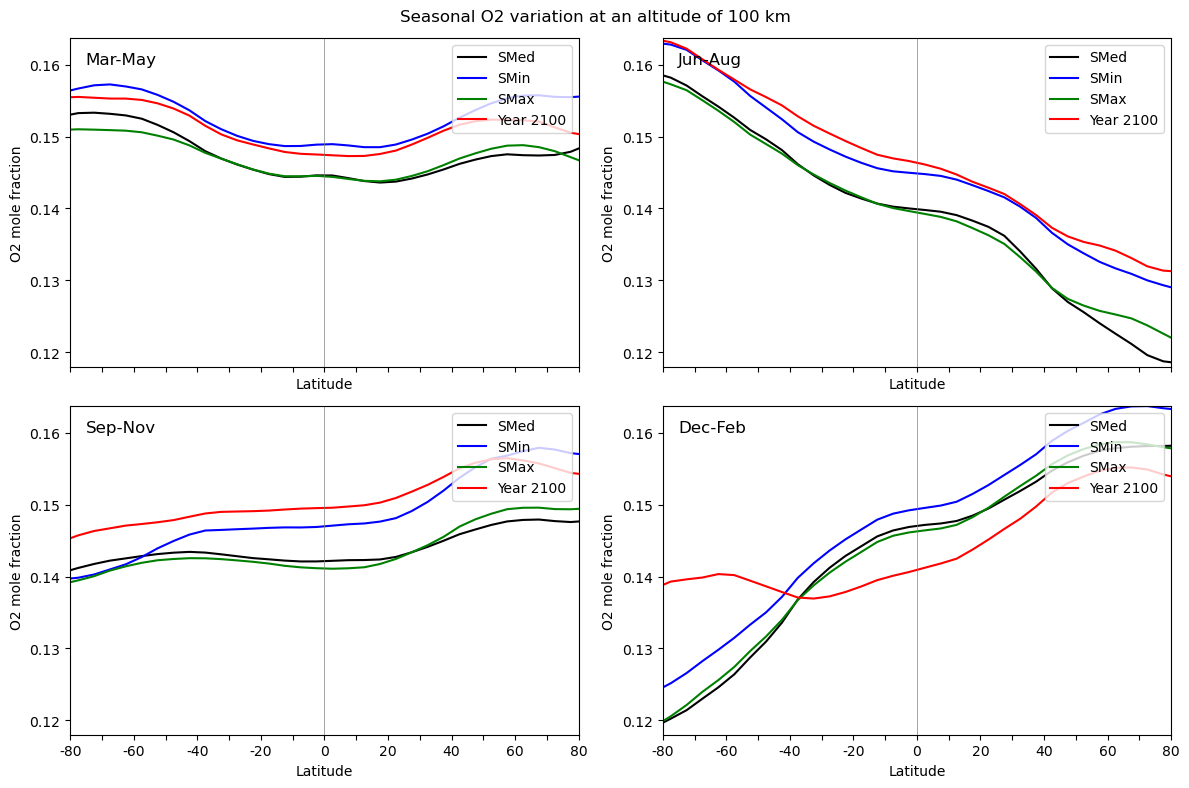

In [91]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8), sharex=True)
lat = med_spr['lat']

# Plot WACCM data - SMed
axes[0, 0].plot(lat, med_spr , color='black', linestyle='solid', label='SMed')
axes[0, 1].plot(lat, med_sum , color='black', linestyle='solid', label='SMed')
axes[1, 0].plot(lat, med_aut , color='black', linestyle='solid', label='SMed')
axes[1, 1].plot(lat, med_win , color='black', linestyle='solid', label='SMed')

# Plot WACCM data - SMin
axes[0, 0].plot(lat, min_spr , color='blue', linestyle='solid', label='SMin')
axes[0, 1].plot(lat, min_sum , color='blue', linestyle='solid', label='SMin')
axes[1, 0].plot(lat, min_aut , color='blue', linestyle='solid', label='SMin')
axes[1, 1].plot(lat, min_win , color='blue', linestyle='solid', label='SMin')

# Plot WACCM data - SMax
axes[0, 0].plot(lat, max_spr , color='green', linestyle='solid', label='SMax')
axes[0, 1].plot(lat, max_sum , color='green', linestyle='solid', label='SMax')
axes[1, 0].plot(lat, max_aut , color='green', linestyle='solid', label='SMax')
axes[1, 1].plot(lat, max_win , color='green', linestyle='solid', label='SMax')

# Plot WACCM data - CliC
axes[0, 0].plot(lat, cli_spr, color='red', label='Year 2100')
axes[0, 1].plot(lat, cli_sum, color='red', label='Year 2100')
axes[1, 0].plot(lat, cli_aut, color='red', label='Year 2100')
axes[1, 1].plot(lat, cli_win, color='red', label='Year 2100')

for ax in axes.flatten():
    ax.axvline(x=0, color='gray', linestyle='-', linewidth=0.5)
    ax.set_xlim(-80, 80)
    ax.set_ylim(ylim_min, ylim_max)
    ax.set_xlabel('Latitude')
    ax.set_ylabel(f'{var} mole fraction')
    
    xticks = np.arange(-80, 81, 10)
    xticklabels = ['' if i % 2 != 0 else str(tick) for i, tick in enumerate(xticks)]
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticklabels)

    ax.legend()

for i, row in enumerate(axes):
    for j, ax in enumerate(row):
        label = ['Mar-May', 'Jun-Aug', 'Sep-Nov','Dec-Feb'][i * 2 + j]
        ax.text(0.03, 0.92, label, transform=ax.transAxes, fontsize=12)

axes[0, 0].legend(loc='upper right')
axes[0, 1].legend(loc='upper right')
axes[1, 0].legend(loc='upper right')
axes[1, 1].legend(loc='upper right')

plt.suptitle(f'Seasonal {var} variation at an altitude of {altitude} km')
plt.tight_layout()
plt.savefig(f'/home/home02/cm21cmr/Sporadic-E-Project/Figures/seasonal_latsl_{var}_{altitude}' , dpi=400, bbox_inches='tight')
plt.show()

# Intial Year 2100 Variables

In [34]:
ref_path = '/resstore/b0243/Data/Sporadic_E/FX2100f19f19mg16NaFeMgiontransport_OUTPUT/hist/FX2100f19f19mg16NaFeMgiontransport.cam.h1.2100-01-01-00000.nc'
ref_file = xr.open_dataset(ref_path, decode_times=False)
ref_file

<xarray.Dataset>
Dimensions:       (lat: 96, lon: 144, mlat: 97, mlon: 80, lev: 126, ilev: 127,
                   time: 30, nbnd: 2)
Coordinates:
  * lat           (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
  * lon           (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * mlat          (mlat) float64 -90.0 -88.12 -86.24 -84.33 ... 86.24 88.12 90.0
  * mlon          (mlon) float64 -180.0 -175.5 -171.0 ... 166.5 171.0 175.5
  * lev           (lev) float64 4.055e-10 5.207e-10 6.686e-10 ... 970.6 992.6
  * ilev          (ilev) float64 3.551e-10 4.559e-10 5.854e-10 ... 985.1 1e+03
  * time          (time) float64 0.0 1.0 2.0 3.0 4.0 ... 26.0 27.0 28.0 29.0
Dimensions without coordinates: nbnd
Data variables: (12/113)
    gw            (lat) float64 ...
    hyam          (lev) float64 ...
    hybm          (lev) float64 ...
    P0            float64 ...
    hyai          (ilev) float64 ...
    hybi          (ilev) float64 ...
    ...            ...
    UI            (time, lev, lat, lon) float32 ...
    V             (time, lev, lat, lon) float32 ...
    VI            (time, lev, lat, lon) float32 ...
    WI            (time, lev, lat, lon) float32 ...
    Z3            (time, lev, lat, lon) float32 ...
    e             (time, lev, lat, lon) float32 ...
Attributes:
    Conventions:       CF-1.0
    source:            CAM
    case:              FX2100f19f19mg16NaFeMgiontransport
    logname:           earfw
    host:              d8s5b4.arc4.leed
    initial_file:      /resstore/b0154/Data/earfw/MCHEM24/Joe_WACCMX_2_WF_lev...
    topography_file:   /nobackup/earfw/cesm2_inputdata//atm/cam/topo/USGS-gto...
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    time_period_freq:  day_1

In [79]:
def cli_vmr(var):
    testpath = '/resstore/b0243/Data/Sporadic_E/FX2100f19f19mg16NaFeMgiontransport_OUTPUT/hist/FX2100f19f19mg16NaFeMgiontransport.cam.h1.2100-01-01-00000.nc'
    testfile = xr.open_dataset(testpath, decode_times=False)
    timeslice = testfile.sel(time=0)
    value = timeslice[var].item()
    return value

def cli_conc(var, lev):
    testpath = '/resstore/b0243/Data/Sporadic_E/FX2100f19f19mg16NaFeMgiontransport_OUTPUT/hist/FX2100f19f19mg16NaFeMgiontransport.cam.h1.2100-01-01-00000.nc'
    testfile = xr.open_dataset(testpath, decode_times=False)
    timeslice = testfile.sel(time=0, lev=lev, method = 'nearest')
    lat_av = timeslice[var].mean(dim='lat')
    lon_av = lat_av.mean(dim='lon')
    value = lon_av.item()
    return value

def med_vmr(var):
    testpath = '/resstore/b0243/Data/Sporadic_E/Solar_Med/archive_yr2000/ACP_CESM213_FX2000_f19_f19_mg16_Na_Fe_Mg_iontransport.cam.h2.0001-01-01-00000.nc'
    testfile = xr.open_dataset(testpath, decode_times=False)
    timeslice = testfile.sel(time=0)
    value = timeslice[var].item()
    return value

def med_conc(var, lev):
    testpath = '/resstore/b0243/Data/Sporadic_E/Solar_Med/archive_yr2000/ACP_CESM213_FX2000_f19_f19_mg16_Na_Fe_Mg_iontransport.cam.h2.0001-01-01-00000.nc'
    testfile = xr.open_dataset(testpath, decode_times=False)
    timeslice = testfile.sel(time=0, lev=lev, method = 'nearest')
    lat_av = timeslice[var].mean(dim='lat')
    lon_av = lat_av.mean(dim='lon')
    value = lon_av.item()
    return value

In [85]:
cli_co2_vmr = cli_vmr('co2vmr')
print(cli_co2_vmr)
cli_ch4_vmr = cli_vmr('ch4vmr')
print(cli_ch4_vmr)
cli_n2o_vmr = cli_vmr('n2ovmr')
print(cli_n2o_vmr)
print(' ')
cli_co2_conc = cli_conc('CO2', 9.925561e+02)
print(cli_co2_conc)
# cli_ch4_conc = cli_conc('CH4', 9.925561e+02)
# print(cli_ch4_conc)
# cli_n2o_conc = cli_conc('N2O', 9.925561e+02)
# print(cli_n2o_conc)
cli_T = cli_conc('T', 9.925561e+02)
print(cli_T)

0.0006680727237835526
1.6564575844313367e-06
4.0581846860732185e-07
 
0.000668676511850208
282.5623474121094


In [84]:
med_co2_vmr = med_vmr('co2vmr')
print(med_co2_vmr)
med_ch4_vmr = med_vmr('ch4vmr')
print(med_ch4_vmr)
med_n2o_vmr = med_vmr('n2ovmr')
print(med_n2o_vmr)
print(' ')
med_co2_conc = med_conc('CO2', 9.925561e+02)
print(med_co2_conc)
# med_ch4_conc = med_conc('CH4')
# print(med_ch4_conc)
# med_n2o_conc = med_conc('N2O')
# print(med_n2o_conc)
med_T = med_conc('T', 9.925561e+02)
print(med_T)

0.00036810588790103793
1.7501276943221455e-06
3.1555376267533575e-07
 
0.00036843877751380205
276.2421569824219


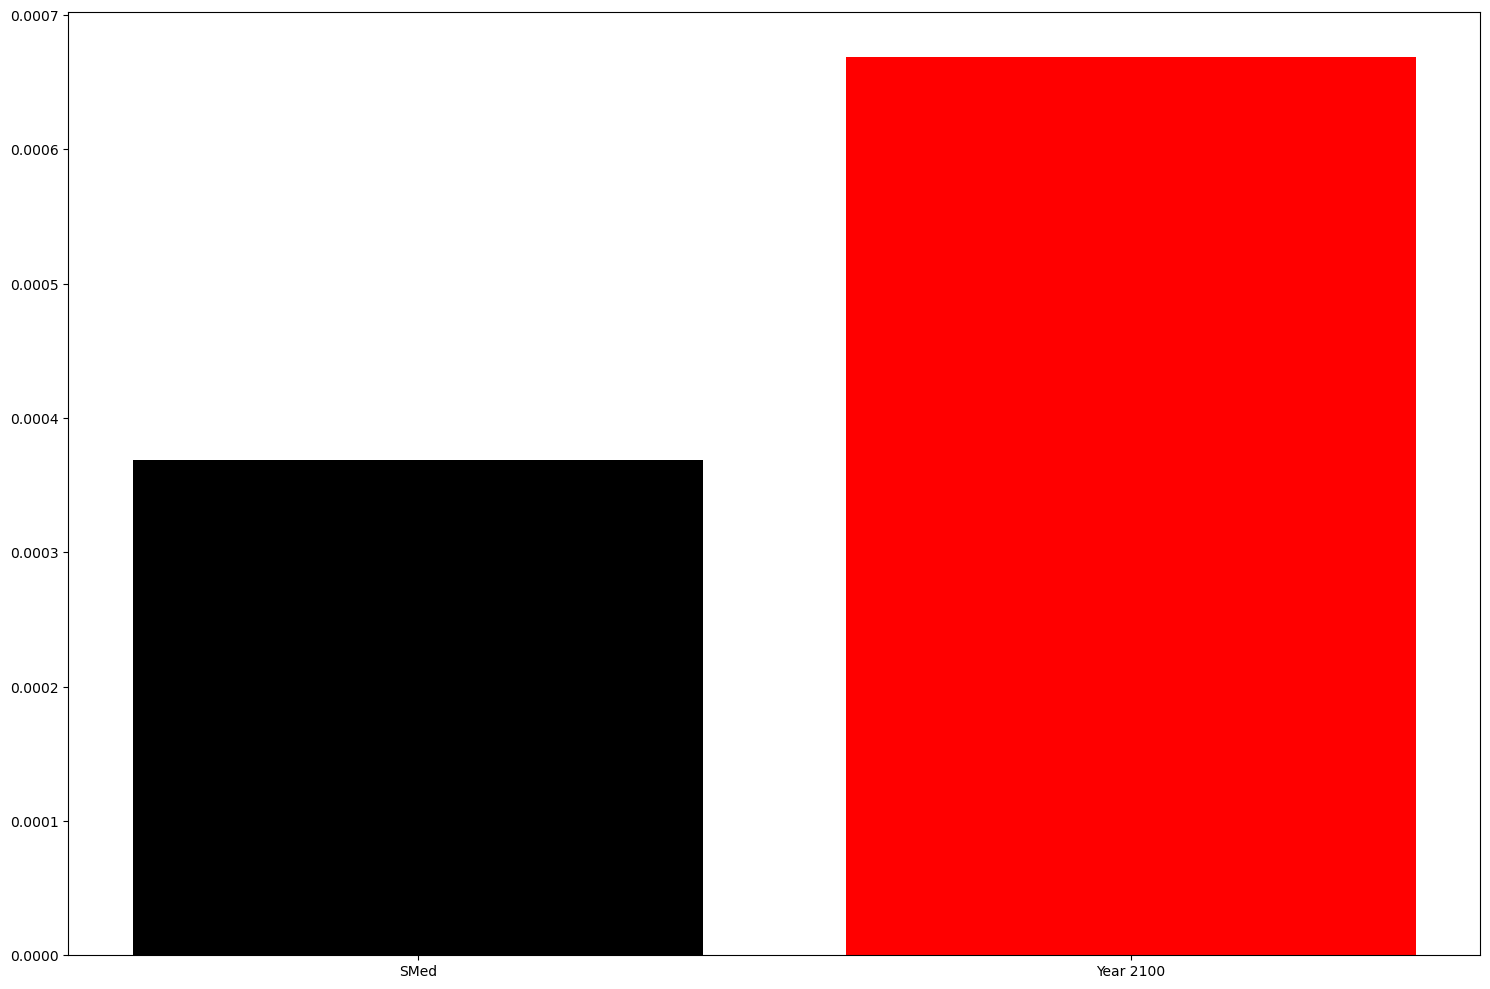

In [91]:
runs = ['SMed', 'Year 2100']
data = [med_co2_conc, cli_co2_conc]

fig , ax = plt.subplots(figsize = (15,10)) 

ax = ax.bar(runs, data, color=['black', 'red'])
plt.tight_layout()
plt.show()

# Updated value line plots

In [ ]:
# testpath = f'/resstore/b0243/Data/Sporadic_E/Solar_Med/archive_yr2000/ACP_CESM213_FX2000_f19_f19_mg16_Na_Fe_Mg_iontransport.cam.h0.0001-01.nc'
# test = xr.open_dataset(testpath, decode_times=False)
# test

In [ ]:
# ds = xr.open_dataset(testpath, decode_times=False)
# ds = ds[var].sel(time=ds['time'][-1].item())
# ds = ds.assign_coords(altavg=ds_sum_med['altavg']).swap_dims({'lev':'altavg'})
# ds = ds.sel(altavg = altitude, method = 'nearest')

# lat_bins = np.arange(-90, 95, 5)  # Ensures full 5-degree bins
# lat_bin_labels = (lat_bins[:-1] + lat_bins[1:]) / 2  # Midpoints of bins

# binned = (
#         ds.groupby_bins("lat", lat_bins, labels=lat_bin_labels).mean(dim=["lat", "lon"])
#            )

# # Reset dimension name by converting `lat_bins` to `lat`
# binned = binned.rename({"lat_bins": "lat"})

# # Ensure `lat` is a proper coordinate
# binned = binned.assign_coords(lat=("lat", binned.lat.values))
# binned

In [ ]:
# testavg = var_month_avg(testpath, var, 100)
# testavg

In [ ]:
# def month_to_season(run_name):
    
#     if run_name == 'Climate Change':
#         months = {1,2,3,4,5,6,7,8,9,10,11}

#     else: 
#         months = {1,2,3,4,5,6,7,8,9,10,11,12}

#     spr
    
#     for month in months:
        
#         month_str = f"{month:02}"
        
#         if run_name == 'Solar Med':
#             filepath = f'/resstore/b0243/Data/Sporadic_E/Solar_Med/archive_yr2000/ACP_CESM213_FX2000_f19_f19_mg16_Na_Fe_Mg_iontransport.cam.h0.0001-{month_str}.nc'
#             run_str = 'med'

#         elif run_name == 'Solar Max':
#             filepath = f'/resstore/b0243/Data/Sporadic_E/Solar_Max/archive_yr2000/atm/hist/SMax_3M_FX2000_f19f19mg16.cam.h0.0001-{month_str}.nc'
#             run_str = 'max'
    
#         elif run_name == 'Solar Min':
#             filepath = f'/resstore/b0243/Data/Sporadic_E/Solar_Min/archive_yr2000/atm/hist/SMin_3M_FX2000_f19f19mg16.cam.h0.0001-{month_str}.nc'
#             run_str = 'min'

#         elif run_name == 'Climate Change':
#             filepath = f'/resstore/b0243/Data/Sporadic_E/FX2100f19f19mg16NaFeMgiontransport_OUTPUT/hist/FX2100f19f19mg16NaFeMgiontransport.cam.h0.2100-{month_str}.nc'
#             run_str = 'cli'
    
#         month_avg =  var_month_avg(filepath, var, altitude)
#         month_avg.name = f'{run_str}_{month}_avg'
#         print(month_avg)

#         if month == 1:
#             month_avg
        
#     return month_avg

## Functions

Test to check variable names

In [2]:
testpath = f'/resstore/b0243/Data/Sporadic_E/Solar_Med/archive_yr2000/ACP_CESM213_FX2000_f19_f19_mg16_Na_Fe_Mg_iontransport.cam.h0.0001-01.nc'
test = xr.open_dataset(testpath, decode_times=False)
test

<xarray.Dataset>
Dimensions:          (lat: 96, lon: 144, mlat: 97, mlon: 80, zlon: 1, nbnd: 2,
                      lev: 126, ilev: 127, time: 1)
Coordinates:
  * lat              (lat) float64 -90.0 -88.11 -86.21 ... 86.21 88.11 90.0
  * lon              (lon) float64 0.0 2.5 5.0 7.5 ... 350.0 352.5 355.0 357.5
  * mlat             (mlat) float64 -90.0 -88.12 -86.24 ... 86.24 88.12 90.0
  * mlon             (mlon) float64 -180.0 -175.5 -171.0 ... 166.5 171.0 175.5
  * zlon             (zlon) float64 0.0
  * lev              (lev) float64 4.055e-10 5.207e-10 6.686e-10 ... 970.6 992.6
  * ilev             (ilev) float64 3.551e-10 4.559e-10 ... 985.1 1e+03
  * time             (time) float64 31.0
Dimensions without coordinates: nbnd
Data variables: (12/713)
    gw               (lat) float64 ...
    zlon_bnds        (zlon, nbnd) float64 ...
    hyam             (lev) float64 ...
    hybm             (lev) float64 ...
    P0               float64 ...
    hyai             (ilev) float64 ...
    ...               ...
    WD_HOCL          (time, lat, lon) float32 ...
    WI               (time, lev, lat, lon) float32 ...
    WTHzm            (time, ilev, lat, zlon) float32 ...
    Z3               (time, lev, lat, lon) float32 ...
    e                (time, lev, lat, lon) float32 ...
    e_SRF            (time, lat, lon) float32 ...
Attributes:
    Conventions:       CF-1.0
    source:            CAM
    case:              ACP_CESM213_FX2000_f19_f19_mg16_Na_Fe_Mg_iontransport
    logname:           earfw
    host:              d13s7b4.arc4.lee
    initial_file:      /nobackup/earfw/cesm2/cases/ACP_CESM213_FX2000_f19_f19...
    topography_file:   /nobackup/earfw/cesm2_inputdata//atm/cam/topo/USGS-gto...
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    time_period_freq:  month_1

In [3]:
def var_month_avg_new(filepath, var, altitude):

    ds = xr.open_dataset(filepath, decode_times=False)
    ds = ds[var].sel(time=ds['time'][-1].item())
    ds = ds.sel(lev =  altitude, method='nearest')

    lat_bins = np.arange(-90, 95, 5)  # Ensures full 5-degree bins
    lat_bin_labels = (lat_bins[:-1] + lat_bins[1:]) / 2  # Midpoints of bins

    binned = (
            ds.groupby_bins("lat", lat_bins, labels=lat_bin_labels).mean(dim=["lat", "lon"])
                )

    # Reset dimension name by converting `lat_bins` to `lat`
    binned = binned.rename({"lat_bins": "lat"})

    # Ensure `lat` is a proper coordinate
    binned = binned.assign_coords(lat=("lat", binned.lat.values))

    return binned

In [13]:
def month_to_season_new(run_name, season):
    
    if season == 'spr':
        months = [3,4,5] 

    elif season =='sum':
        months = [6,7,8] 

    elif season =='aut':
        months = [9,10,11]    
    
    elif season == 'win' and run_name != 'Climate Change':
        months = [12,1,2]
    
    ######################
    if run_name == 'Climate Change' and season == 'win':
            # month_1_avg = var_month_avg_new('/resstore/b0243/Data/Sporadic_E/FX2100f19f19mg16NaFeMgiontransport_OUTPUT/hist/FX2100f19f19mg16NaFeMgiontransport.cam.h0.2100-12.nc', var, altitude)
            month_2_avg = var_month_avg_new('/resstore/b0243/Data/Sporadic_E/FX2101f19f19mg16NaFeMgiontransport_OUTPUT/atm/hist/FX2101f19f19mg16NaFeMgiontransport.cam.h0.2100-01.nc', var, altitude)
            print(f'{run_name} month 1 complete')
            month_3_avg = var_month_avg_new('/resstore/b0243/Data/Sporadic_E/FX2101f19f19mg16NaFeMgiontransport_OUTPUT/atm/hist/FX2101f19f19mg16NaFeMgiontransport.cam.h0.2100-02.nc', var, altitude)
            ds_season = (month_2_avg + month_3_avg)/2
            print(f'{run_name} month 2 complete')

    else:

        for month in months:
        
            month_str = f"{month:02}"
            print(month_str)
            
            if run_name == 'Solar Med':
                filepath = f'/resstore/b0243/Data/Sporadic_E/Solar_Med/archive_yr2000/ACP_CESM213_FX2000_f19_f19_mg16_Na_Fe_Mg_iontransport.cam.h0.0001-{month_str}.nc'
                run_str = 'med'

            elif run_name == 'Solar Max':
                filepath = f'/resstore/b0243/Data/Sporadic_E/Solar_Max/archive_yr2000/atm/hist/SMax_3M_FX2000_f19f19mg16.cam.h0.0001-{month_str}.nc'
                run_str = 'max'
    
            elif run_name == 'Solar Min':
                filepath = f'/resstore/b0243/Data/Sporadic_E/Solar_Min/archive_yr2000/atm/hist/SMin_3M_FX2000_f19f19mg16.cam.h0.0001-{month_str}.nc'
                run_str = 'min'

            elif run_name == 'Climate Change':
                filepath = f'/resstore/b0243/Data/Sporadic_E/FX2100f19f19mg16NaFeMgiontransport_OUTPUT/hist/FX2100f19f19mg16NaFeMgiontransport.cam.h0.2100-{month_str}.nc'
                run_str = 'cli'
        
            if month == months[0]:
                month_1_avg =  var_month_avg_new(filepath, var, altitude)
                print(f'{run_name} month {month} complete')

            elif month == months[1]:
                month_2_avg =  var_month_avg_new(filepath, var, altitude)
                print(f'{run_name} month {month} complete')

            elif month == months[2]:
                month_3_avg =  var_month_avg_new(filepath, var, altitude)
                print(f'{run_name} month {month} complete')
        
    
        ds_season = (month_1_avg + month_2_avg + month_3_avg)/3
    
    return ds_season

## Plotting

In [26]:
var = 'CO'
altitude = 0.0002

In [27]:
run_name = 'Solar Med' # # OR # 'Solar Med'
                            # 'Solar Max'
                            # 'Solar Min'
                            # 'Climate Change'

# season = 'spr' # # OR 'spr'
                    # 'sum'
                    # 'aut'
                    # 'win'

med_spr = month_to_season_new(run_name, 'spr')
med_sum = month_to_season_new(run_name, 'sum')
med_aut = month_to_season_new(run_name, 'aut')
med_win = month_to_season_new(run_name, 'win')

run_name = 'Solar Max'
max_spr = month_to_season_new(run_name, 'spr')
max_sum = month_to_season_new(run_name, 'sum')
max_aut = month_to_season_new(run_name, 'aut')
max_win = month_to_season_new(run_name, 'win')

run_name = 'Solar Min'
min_spr = month_to_season_new(run_name, 'spr')
min_sum = month_to_season_new(run_name, 'sum')
min_aut = month_to_season_new(run_name, 'aut')
min_win = month_to_season_new(run_name, 'win')

run_name = 'Climate Change'
cli_spr = month_to_season_new(run_name, 'spr')
cli_sum = month_to_season_new(run_name, 'sum')
cli_aut = month_to_season_new(run_name, 'aut')
cli_win = month_to_season_new(run_name, 'win')

03
Solar Med month 3 complete
04
Solar Med month 4 complete
05
Solar Med month 5 complete
06
Solar Med month 6 complete
07
Solar Med month 7 complete
08
Solar Med month 8 complete
09
Solar Med month 9 complete
10
Solar Med month 10 complete
11
Solar Med month 11 complete
12
Solar Med month 12 complete
01
Solar Med month 1 complete
02
Solar Med month 2 complete
03
Solar Max month 3 complete
04
Solar Max month 4 complete
05
Solar Max month 5 complete
06
Solar Max month 6 complete
07
Solar Max month 7 complete
08
Solar Max month 8 complete
09
Solar Max month 9 complete
10
Solar Max month 10 complete
11
Solar Max month 11 complete
12
Solar Max month 12 complete
01
Solar Max month 1 complete
02
Solar Max month 2 complete
03
Solar Min month 3 complete
04
Solar Min month 4 complete
05
Solar Min month 5 complete
06
Solar Min month 6 complete
07
Solar Min month 7 complete
08
Solar Min month 8 complete
09
Solar Min month 9 complete
10
Solar Min month 10 complete
11
Solar Min month 11 complete
12

In [28]:
# cli_win
ylim_min = np.min([med_spr, med_sum, med_aut,med_win,max_spr,max_sum,max_aut,max_win,min_spr,min_sum,min_aut,min_win,cli_spr,cli_sum,cli_aut,cli_win])
ylim_max = np.max([med_spr, med_sum, med_aut,med_win,max_spr,max_sum,max_aut,max_win,min_spr,min_sum,min_aut,min_win,cli_spr,cli_sum,cli_aut,cli_win])

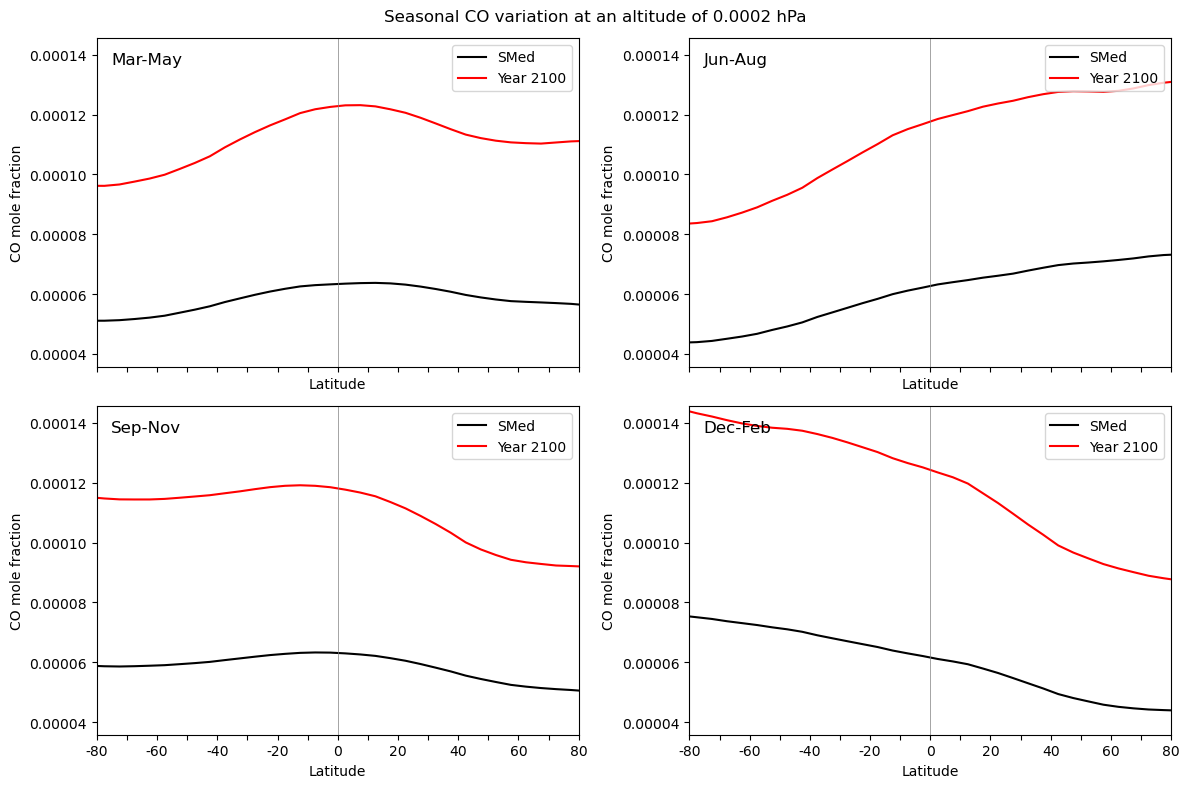

In [29]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8), sharex=True)
lat = med_spr['lat']

# Plot WACCM data - SMed
axes[0, 0].plot(lat, med_spr , color='black', linestyle='solid', label='SMed')
axes[0, 1].plot(lat, med_sum , color='black', linestyle='solid', label='SMed')
axes[1, 0].plot(lat, med_aut , color='black', linestyle='solid', label='SMed')
axes[1, 1].plot(lat, med_win , color='black', linestyle='solid', label='SMed')

# # Plot WACCM data - SMin
# axes[0, 0].plot(lat, min_spr , color='blue', linestyle='solid', label='SMin')
# axes[0, 1].plot(lat, min_sum , color='blue', linestyle='solid', label='SMin')
# axes[1, 0].plot(lat, min_aut , color='blue', linestyle='solid', label='SMin')
# axes[1, 1].plot(lat, min_win , color='blue', linestyle='solid', label='SMin')

# # Plot WACCM data - SMax
# axes[0, 0].plot(lat, max_spr , color='green', linestyle='solid', label='SMax')
# axes[0, 1].plot(lat, max_sum , color='green', linestyle='solid', label='SMax')
# axes[1, 0].plot(lat, max_aut , color='green', linestyle='solid', label='SMax')
# axes[1, 1].plot(lat, max_win , color='green', linestyle='solid', label='SMax')

# Plot WACCM data - CliC
axes[0, 0].plot(lat, cli_spr, color='red', label='Year 2100')
axes[0, 1].plot(lat, cli_sum, color='red', label='Year 2100')
axes[1, 0].plot(lat, cli_aut, color='red', label='Year 2100')
axes[1, 1].plot(lat, cli_win, color='red', label='Year 2100')

for ax in axes.flatten():
    ax.axvline(x=0, color='gray', linestyle='-', linewidth=0.5)
    ax.set_xlim(-80, 80)
    ax.set_ylim(ylim_min, ylim_max)
    ax.set_xlabel('Latitude')
    ax.set_ylabel(f'{var} mole fraction')
    
    xticks = np.arange(-80, 81, 10)
    xticklabels = ['' if i % 2 != 0 else str(tick) for i, tick in enumerate(xticks)]
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticklabels)

    ax.legend()

for i, row in enumerate(axes):
    for j, ax in enumerate(row):
        label = ['Mar-May', 'Jun-Aug', 'Sep-Nov','Dec-Feb'][i * 2 + j]
        ax.text(0.03, 0.92, label, transform=ax.transAxes, fontsize=12)

axes[0, 0].legend(loc='upper right')
axes[0, 1].legend(loc='upper right')
axes[1, 0].legend(loc='upper right')
axes[1, 1].legend(loc='upper right')

plt.suptitle(f'Seasonal {var} variation at an altitude of {altitude} hPa')
plt.tight_layout()
plt.savefig(f'/home/home02/cm21cmr/Sporadic-E-Project/Figures/new_seasonal_latsl_{var}_{altitude}.png' , dpi=400, bbox_inches='tight')
plt.show()